# import libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings; warnings.simplefilter('ignore')

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.layers import SimpleRNN, LSTM, GRU, Dense, Embedding
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import SimpleRNN, LSTM, GRU, Dense, Embedding
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [2]:
# initialize file names
f1 = 'dataset1.csv' # 
f2 = 'dataset2.csv' #
f3 = 'dataset3.csv' #

# initialize dataframes: all empty
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()

files_list = [f1, f2, f3]

# funcation to load in df

In [3]:
# initialize dataframes: all empty
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()

files_list = [f1, f2, f3]

def load_df(fname, df, name):
  file_path = 'dataset-csv-files/' + fname

  # Read the CSV file
  new_data = pd.read_csv(file_path)

  # If df is still empty, you can directly assign new_data to df
  if df.empty:
    df = new_data
  else:
    # Concatenate the new data with the existing DataFrame
    df = pd.concat([df, new_data], ignore_index=True)

  print(name + ' has loaded in.')
  #print(df.shape)
  #print(df.head())
  #print('\n')
  return df

df1 = load_df(f1, df1, 'df1')
df2 = load_df(f2, df2, 'df2')
df3 = load_df(f3, df3, 'df3')

df_list = [df1, df2, df3]

df1 has loaded in.
df2 has loaded in.
df3 has loaded in.


# map df values for datasets

In [4]:
# Dataset 1
df1_texts = df1['review_text'].values
df1_labels = df1['class_index'].map({1: 0, 2: 1}).values

# Dataset 2
df2_texts = df2['text'].values
df2_labels = df2['label'].map({'__label__2': 1, '__label__1': 0}).values.astype(int)

# Dataset 3
df3_texts = df3['reviewText'].astype(str).values # Your text data
df3_labels = df3['rating']

# Vanilla rnn

In [5]:
def VanillaRNN(df_texts, df_labels, name):
    vocab_size = 5000
    embd_len = 32

    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(df_texts)
    sequences = tokenizer.texts_to_sequences(df_texts)

    max_words = max(len(sequence) for sequence in sequences)
    x_data = pad_sequences(sequences, maxlen=max_words)

    x_temp, x_test, y_temp, y_test = train_test_split(x_data, df_labels, test_size=0.2, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42)

    RNN_model = Sequential(name="Simple_RNN")
    RNN_model.add(Embedding(input_dim=vocab_size, output_dim=embd_len, input_length=max_words))
    RNN_model.add(SimpleRNN(128))
    RNN_model.add(Dense(1, activation='sigmoid'))

    RNN_model.compile(loss="binary_crossentropy", optimizer='SGD', metrics=['accuracy'])

    history = RNN_model.fit(x_train, y_train, batch_size=64, epochs=11, verbose=1, validation_data=(x_valid.astype(int), y_valid.astype(int)))

    score = RNN_model.evaluate(x_test.astype(int), y_test.astype(int), verbose=0)
    print(f"\n{name} Vanilla RNN Score---> {score}")
    print()

    print(f'Visualize data for: {name}')

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'SGD Vanilla RNN Model accuracy for {name}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'SGD Vanilla RNN Model loss for {name}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# model training 

Epoch 1/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.5167 - loss: 0.6931 - val_accuracy: 0.5295 - val_loss: 0.6896
Epoch 2/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.5337 - loss: 0.6900 - val_accuracy: 0.5530 - val_loss: 0.6879
Epoch 3/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.5534 - loss: 0.6850 - val_accuracy: 0.5495 - val_loss: 0.6879
Epoch 4/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.5697 - loss: 0.6806 - val_accuracy: 0.5725 - val_loss: 0.6851
Epoch 5/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.5890 - loss: 0.6751 - val_accuracy: 0.5525 - val_loss: 0.6860
Epoch 6/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.5933 - loss: 0.6684 - val_accuracy: 0.5610 - val_loss: 0.6848
Epoch 7/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.6092 - loss: 0.6637 - val_accuracy: 0.5670 - val_loss: 0.6844
Epoch 8/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.6260 - loss: 0.6523 - val_accuracy: 0.5135 - v

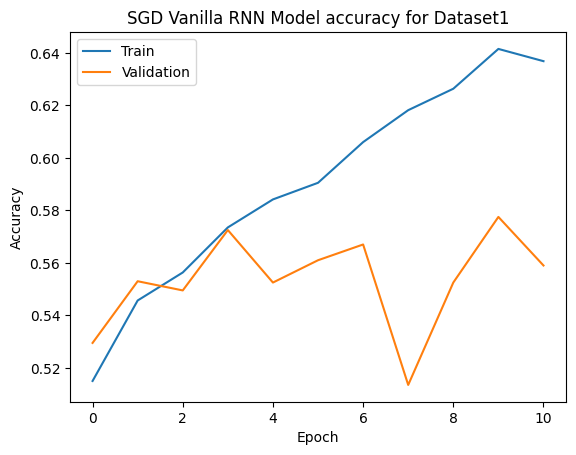

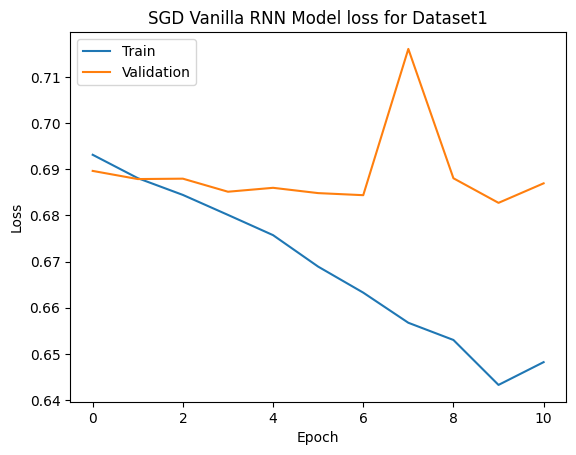

In [6]:
VanillaRNN(df1_texts, df1_labels, 'Dataset1')

Epoch 1/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.5096 - loss: 0.6935 - val_accuracy: 0.5340 - val_loss: 0.6898
Epoch 2/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.5343 - loss: 0.6891 - val_accuracy: 0.5270 - val_loss: 0.6943
Epoch 3/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.5562 - loss: 0.6821 - val_accuracy: 0.5235 - val_loss: 0.6911
Epoch 4/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.5579 - loss: 0.6831 - val_accuracy: 0.5390 - val_loss: 0.6895
Epoch 5/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.5618 - loss: 0.6829 - val_accuracy: 0.5420 - val_loss: 0.6904
Epoch 6/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.5891 - loss: 0.6711 - val_accuracy: 0.5305 - val_loss: 0.6887
Epoch 7/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.6038 - loss: 0.6673 - val_accuracy: 0.5370 - val_loss: 0.6880
Epoch 8/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.6065 - loss: 0.6629 - val_accuracy: 0.5380 - v

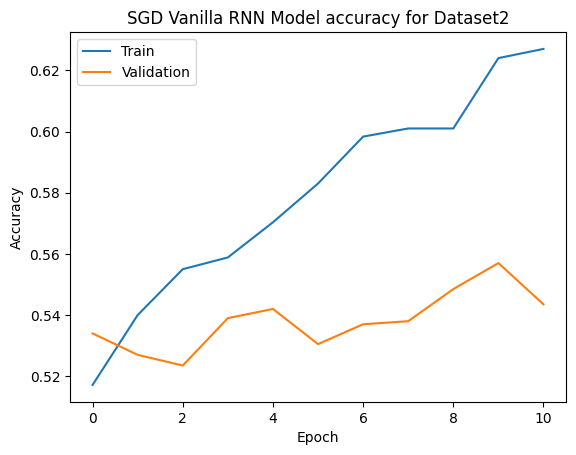

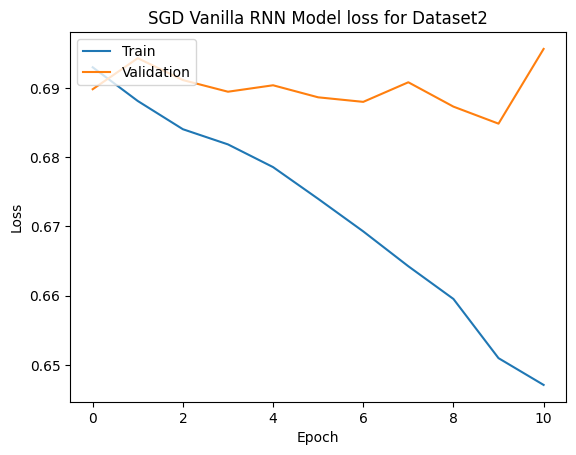

In [7]:
VanillaRNN(df2_texts, df2_labels, 'Dataset2')

Epoch 1/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 69s 609ms/step - accuracy: 0.4986 - loss: 0.6950 - val_accuracy: 0.5133 - val_loss: 0.6925
Epoch 2/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 69s 612ms/step - accuracy: 0.5230 - loss: 0.6922 - val_accuracy: 0.5233 - val_loss: 0.6923
Epoch 3/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 85s 753ms/step - accuracy: 0.5210 - loss: 0.6916 - val_accuracy: 0.5200 - val_loss: 0.6908
Epoch 4/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 92s 812ms/step - accuracy: 0.5417 - loss: 0.6890 - val_accuracy: 0.5371 - val_loss: 0.6896
Epoch 5/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 91s 806ms/step - accuracy: 0.5546 - loss: 0.6909 - val_accuracy: 0.5121 - val_loss: 0.6929
Epoch 6/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 89s 785ms/step - accuracy: 0.5111 - loss: 0.6938 - val_accuracy: 0.4929 - val_loss: 0.7015
Epoch 7/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 87s 773ms/step - accuracy: 0.5037 - loss: 0.6949 - val_accuracy: 0.4929 - val_loss: 0.6935
Epoch 8/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 88s 777ms/step - accuracy: 0.5012 - loss: 0

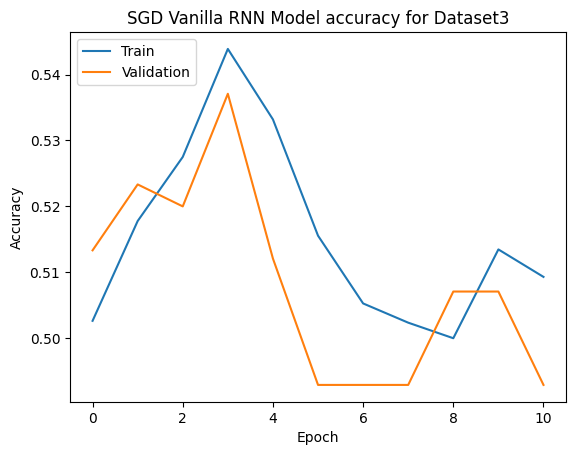

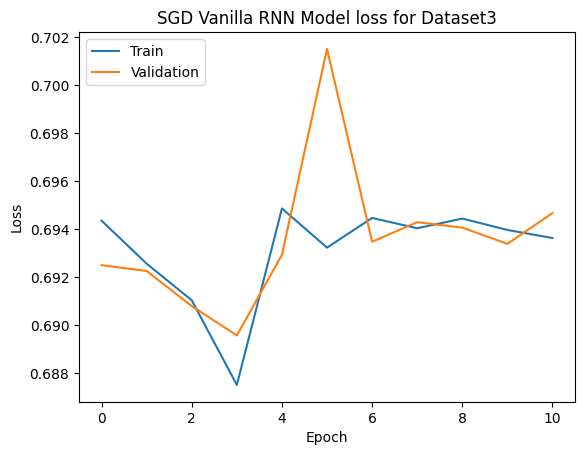

In [8]:
VanillaRNN(df3_texts, df3_labels, 'Dataset3')

# GRU

In [9]:
def GRU_Model(df_texts, df_labels, name):
    vocab_size = 5000
    embd_len = 32

    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(df_texts)
    sequences = tokenizer.texts_to_sequences(df_texts)

    max_words = max(len(sequence) for sequence in sequences)
    x_data = pad_sequences(sequences, maxlen=max_words)

    x_train, x_test, y_train, y_test = train_test_split(x_data, df_labels, test_size=0.2, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

    gru_model = Sequential(name=f"GRU_{name}")
    gru_model.add(Embedding(input_dim=vocab_size, output_dim=embd_len, input_length=max_words))
    gru_model.add(GRU(128, activation='tanh', return_sequences=False))
    gru_model.add(Dense(1, activation='sigmoid'))

    gru_model.compile(loss="binary_crossentropy", optimizer='SGD', metrics=['accuracy'])

    history = gru_model.fit(x_train, y_train, batch_size=64, epochs=11, verbose=1, validation_data=(x_valid, y_valid))

    score = gru_model.evaluate(x_test, y_test, verbose=0)
    print(f"\n{name} GRU Model Score---> {score}")

    # Plot training & validation accuracy values
    plt.xlim(1, 10)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'SGD GRU Model Accuracy for {name}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.xlim(1, 10)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'SGD GRU Model Loss for {name}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


Epoch 1/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 183ms/step - accuracy: 0.4898 - loss: 0.6932 - val_accuracy: 0.5020 - val_loss: 0.6931
Epoch 2/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 183ms/step - accuracy: 0.5012 - loss: 0.6932 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 3/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 181ms/step - accuracy: 0.4913 - loss: 0.6932 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 4/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 183ms/step - accuracy: 0.4863 - loss: 0.6933 - val_accuracy: 0.5040 - val_loss: 0.6931
Epoch 5/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 184ms/step - accuracy: 0.5087 - loss: 0.6932 - val_accuracy: 0.5045 - val_loss: 0.6931
Epoch 6/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 184ms/step - accuracy: 0.5054 - loss: 0.6931 - val_accuracy: 0.5030 - val_loss: 0.6931
Epoch 7/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 184ms/step - accuracy: 0.5021 - loss: 0.6932 - val_accuracy: 0.5060 - val_loss: 0.6931
Epoch 8/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 184ms/step - accuracy: 0.4995 - loss: 0.6932 - val_accu

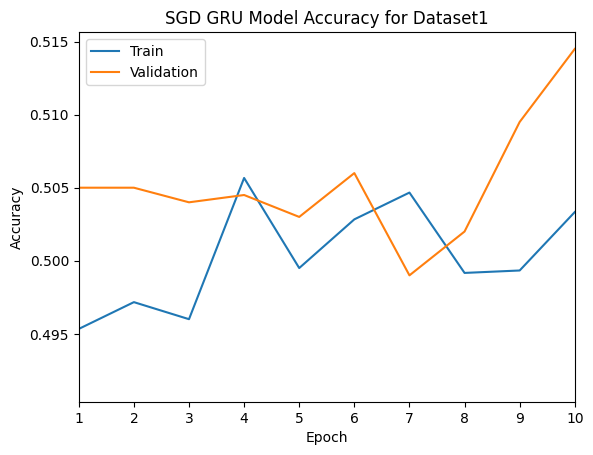

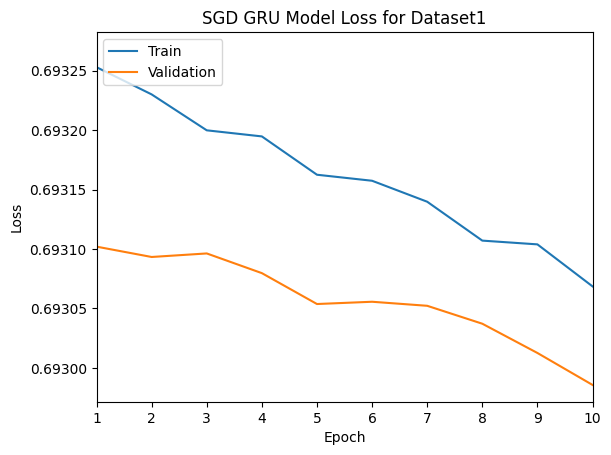

In [10]:
GRU_Model(df1_texts, df1_labels, 'Dataset1')

Epoch 1/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 225ms/step - accuracy: 0.5081 - loss: 0.6931 - val_accuracy: 0.5095 - val_loss: 0.6930
Epoch 2/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 234ms/step - accuracy: 0.5111 - loss: 0.6929 - val_accuracy: 0.5060 - val_loss: 0.6930
Epoch 3/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 238ms/step - accuracy: 0.5079 - loss: 0.6930 - val_accuracy: 0.5090 - val_loss: 0.6930
Epoch 4/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 23s 245ms/step - accuracy: 0.5118 - loss: 0.6930 - val_accuracy: 0.5135 - val_loss: 0.6930
Epoch 5/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 23s 244ms/step - accuracy: 0.5115 - loss: 0.6929 - val_accuracy: 0.5155 - val_loss: 0.6930
Epoch 6/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 238ms/step - accuracy: 0.5170 - loss: 0.6929 - val_accuracy: 0.5125 - val_loss: 0.6930
Epoch 7/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 239ms/step - accuracy: 0.5196 - loss: 0.6928 - val_accuracy: 0.5170 - val_loss: 0.6929
Epoch 8/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 23s 241ms/step - accuracy: 0.5243 - loss: 0.6928 - val_accu

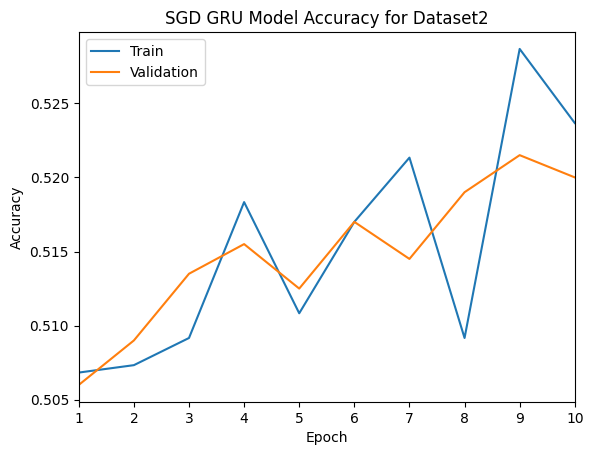

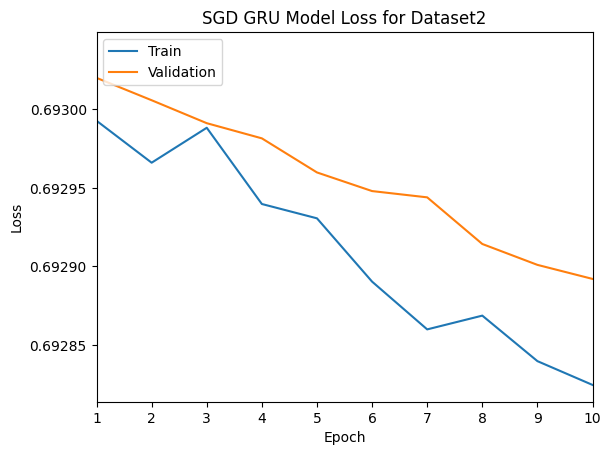

In [11]:
GRU_Model(df2_texts, df2_labels, 'Dataset2')

Epoch 1/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.5232 - loss: 0.6929 - val_accuracy: 0.5063 - val_loss: 0.6931
Epoch 2/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.5169 - loss: 0.6929 - val_accuracy: 0.4950 - val_loss: 0.6931
Epoch 3/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.5112 - loss: 0.6927 - val_accuracy: 0.5179 - val_loss: 0.6930
Epoch 4/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - accuracy: 0.5166 - loss: 0.6928 - val_accuracy: 0.5188 - val_loss: 0.6930
Epoch 5/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.5183 - loss: 0.6928 - val_accuracy: 0.5254 - val_loss: 0.6929
Epoch 6/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.5406 - loss: 0.6927 - val_accuracy: 0.5004 - val_loss: 0.6930
Epoch 7/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.5147 - loss: 0.6928 - val_accuracy: 0.4979 - val_loss: 0.6930
Epoch 8/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.5181 - loss: 0.6926 - val_accu

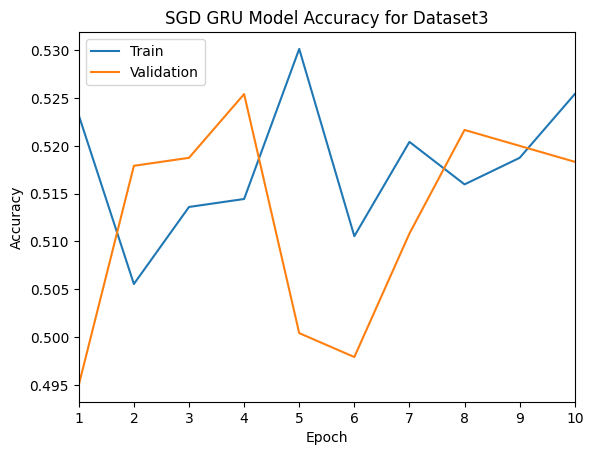

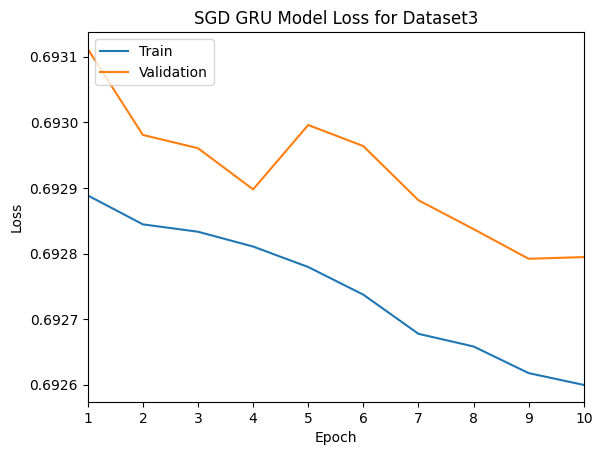

In [12]:
GRU_Model(df3_texts, df3_labels, 'Dataset3')

# LSTM

In [13]:
def LSTM_Model(df_texts, df_labels, name):
    vocab_size = 5000
    embd_len = 32

    # Tokenization and sequence padding
    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(df_texts)
    sequences = tokenizer.texts_to_sequences(df_texts)

    max_words = max(len(sequence) for sequence in sequences)
    x_data = pad_sequences(sequences, maxlen=max_words)

    # Splitting the dataset into train, validation, and test sets
    x_train, x_test, y_train, y_test = train_test_split(x_data, df_labels, test_size=0.2, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

    # Defining the LSTM model
    lstm_model = Sequential(name=f"LSTM_{name}")
    lstm_model.add(Embedding(input_dim=vocab_size, output_dim=embd_len, input_length=max_words))
    lstm_model.add(LSTM(128, activation='tanh', return_sequences=False))
    lstm_model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    lstm_model.compile(loss="binary_crossentropy", optimizer='SGD', metrics=['accuracy'])

    # Training the model
    history = lstm_model.fit(x_train, y_train, batch_size=64, epochs=11, verbose=2, validation_data=(x_valid, y_valid))

    # Evaluating the model
    score = lstm_model.evaluate(x_test, y_test, verbose=0)
    print(f"\n{name} LSTM Model Score---> {score}")

    # Visualization of training and validation metrics
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'SGD LSTM Model Accuracy for {name}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'SGD LSTM Model Loss for {name}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# testing models

Epoch 1/11
94/94 - 17s - 186ms/step - accuracy: 0.4908 - loss: 0.6932 - val_accuracy: 0.4945 - val_loss: 0.6932
Epoch 2/11
94/94 - 16s - 168ms/step - accuracy: 0.4975 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/11
94/94 - 16s - 167ms/step - accuracy: 0.5043 - loss: 0.6932 - val_accuracy: 0.4980 - val_loss: 0.6932
Epoch 4/11
94/94 - 16s - 166ms/step - accuracy: 0.5032 - loss: 0.6932 - val_accuracy: 0.5055 - val_loss: 0.6931
Epoch 5/11
94/94 - 16s - 167ms/step - accuracy: 0.4962 - loss: 0.6932 - val_accuracy: 0.5025 - val_loss: 0.6932
Epoch 6/11
94/94 - 16s - 167ms/step - accuracy: 0.4972 - loss: 0.6932 - val_accuracy: 0.5010 - val_loss: 0.6931
Epoch 7/11
94/94 - 16s - 165ms/step - accuracy: 0.5035 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/11
94/94 - 16s - 166ms/step - accuracy: 0.5033 - loss: 0.6931 - val_accuracy: 0.5020 - val_loss: 0.6931
Epoch 9/11
94/94 - 15s - 165ms/step - accuracy: 0.5050 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss:

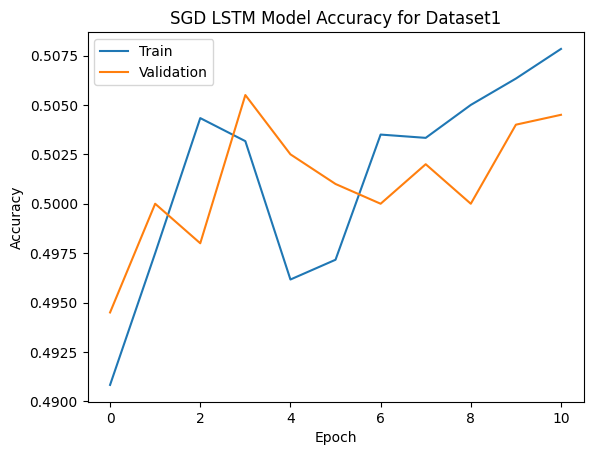

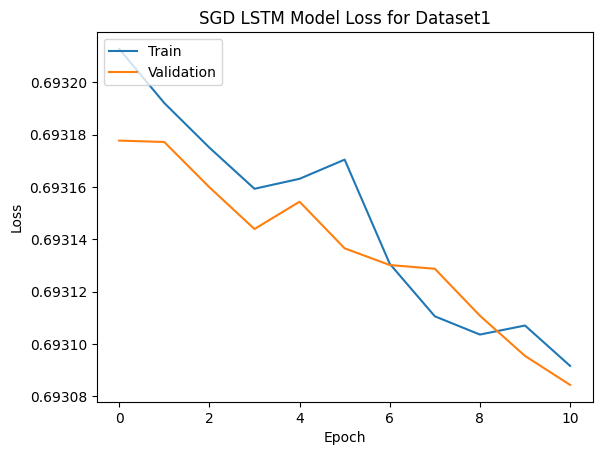

In [14]:
LSTM_Model(df1_texts, df1_labels, 'Dataset1')

Epoch 1/11
94/94 - 20s - 210ms/step - accuracy: 0.4862 - loss: 0.6933 - val_accuracy: 0.4925 - val_loss: 0.6932
Epoch 2/11
94/94 - 18s - 195ms/step - accuracy: 0.4970 - loss: 0.6933 - val_accuracy: 0.4945 - val_loss: 0.6932
Epoch 3/11
94/94 - 18s - 193ms/step - accuracy: 0.4962 - loss: 0.6932 - val_accuracy: 0.4940 - val_loss: 0.6932
Epoch 4/11
94/94 - 18s - 191ms/step - accuracy: 0.4985 - loss: 0.6932 - val_accuracy: 0.4970 - val_loss: 0.6932
Epoch 5/11
94/94 - 18s - 194ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5020 - val_loss: 0.6932
Epoch 6/11
94/94 - 18s - 196ms/step - accuracy: 0.4992 - loss: 0.6932 - val_accuracy: 0.4995 - val_loss: 0.6932
Epoch 7/11
94/94 - 19s - 198ms/step - accuracy: 0.4982 - loss: 0.6932 - val_accuracy: 0.4910 - val_loss: 0.6932
Epoch 8/11
94/94 - 18s - 197ms/step - accuracy: 0.4948 - loss: 0.6932 - val_accuracy: 0.5020 - val_loss: 0.6932
Epoch 9/11
94/94 - 18s - 196ms/step - accuracy: 0.5025 - loss: 0.6932 - val_accuracy: 0.4990 - val_loss:

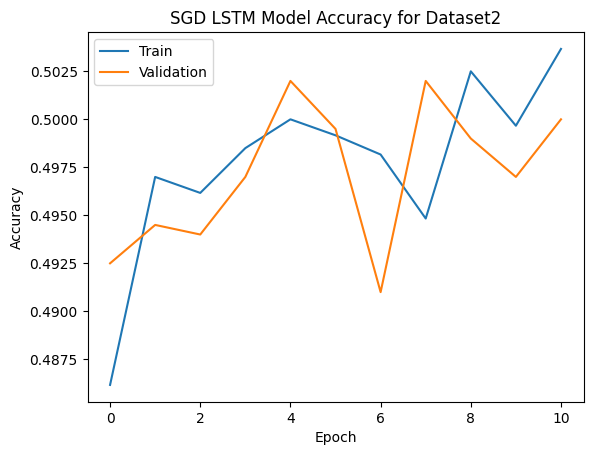

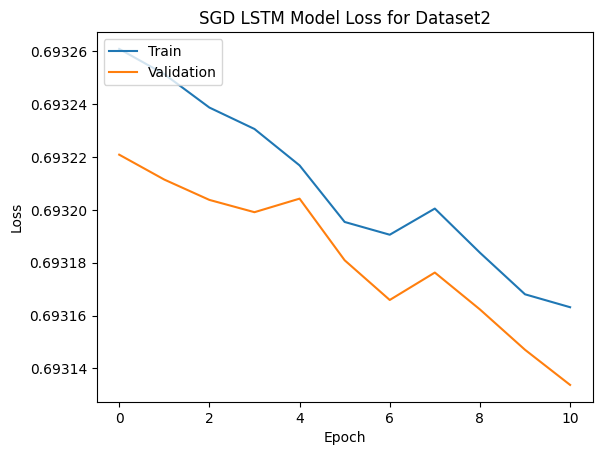

In [15]:
LSTM_Model(df2_texts, df2_labels, 'Dataset2')

Epoch 1/11
113/113 - 229s - 2s/step - accuracy: 0.5015 - loss: 0.6932 - val_accuracy: 0.4904 - val_loss: 0.6932
Epoch 2/11
113/113 - 184s - 2s/step - accuracy: 0.5022 - loss: 0.6931 - val_accuracy: 0.4929 - val_loss: 0.6933
Epoch 3/11
113/113 - 186s - 2s/step - accuracy: 0.5025 - loss: 0.6931 - val_accuracy: 0.4896 - val_loss: 0.6932
Epoch 4/11
113/113 - 185s - 2s/step - accuracy: 0.5076 - loss: 0.6930 - val_accuracy: 0.4929 - val_loss: 0.6933
Epoch 5/11
113/113 - 187s - 2s/step - accuracy: 0.5032 - loss: 0.6930 - val_accuracy: 0.4929 - val_loss: 0.6932
Epoch 6/11
113/113 - 187s - 2s/step - accuracy: 0.5075 - loss: 0.6930 - val_accuracy: 0.4929 - val_loss: 0.6932
Epoch 7/11
113/113 - 187s - 2s/step - accuracy: 0.5040 - loss: 0.6929 - val_accuracy: 0.4946 - val_loss: 0.6931
Epoch 8/11
113/113 - 189s - 2s/step - accuracy: 0.5032 - loss: 0.6929 - val_accuracy: 0.4958 - val_loss: 0.6930
Epoch 9/11
113/113 - 188s - 2s/step - accuracy: 0.5076 - loss: 0.6929 - val_accuracy: 0.5071 - val_loss:

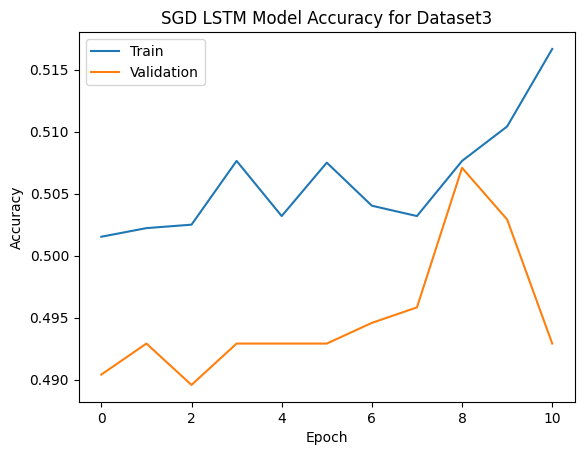

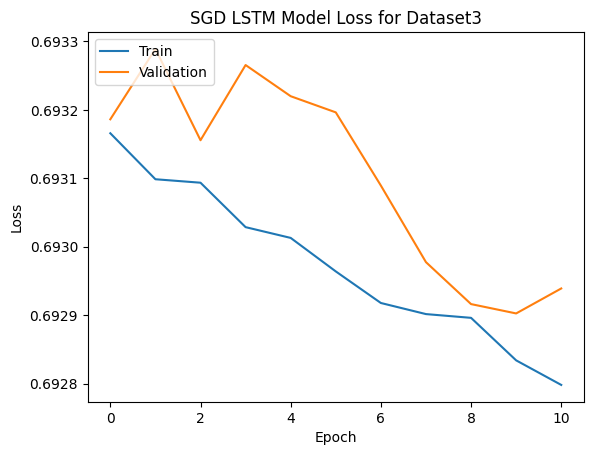

In [16]:
LSTM_Model(df3_texts, df3_labels, 'Dataset3')